## 5

Fuente de datos: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

Los datos a utilizar son los resultados de un diseño completamente aleatorizado para el cual la respuesta son los promedios obtenidos por estudiantes con preparación similar (completaron el curso de preparación y tuvieron un lunch estándar). como función de el nivel de educación parental los cuales pueden ser 6:
- some college
- associate's degree 
- high school
- some high school
- bachelor's degree 
- master's degree 


¿Existe alguna razón para creer que por lo menos algunos promedios de estudiantes para los niveles de educación parental son diferentes?

Se usará $\alpha = 0.01$

## Carga de modulos

In [1]:
import pandas as pd
import numpy as np

import cufflinks as confleis

confleis.go_offline()

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# Uso de memoria por parte del tipo de variables
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 303.7 KB


In [6]:
# Convertir columnas de tipo object a tipo category para optimizar el uso de memoria
columnas_a_convertir = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

for col in columnas_a_convertir:
    df[col] = df[col].astype("category")

In [7]:
# Podemos notar los siguientes cambios
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 30.1 KB


In [8]:
# Ahora veremos la cantidad de valores distintos que tiene cada columna de tipo no númerica:
for col in df.select_dtypes(include='category').columns:
    valores_unicos = df[col].nunique()
    print(f"{col}: {valores_unicos}")

gender: 2
race/ethnicity: 5
parental level of education: 6
lunch: 2
test preparation course: 2


A continuación, se verán los distintos valores que toman cada columna y la cantidad de datos que contienen cada valor:

In [9]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [10]:
# Vemos la cantidad de valores ausentes en cada columna
df.isna().mean()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

## Solución:

Se hara el filtrado de datos. Para ello, se seleccionaran todos los alumnos cuya preparación para el examen se completó y además tuvieron un lunch estándar.

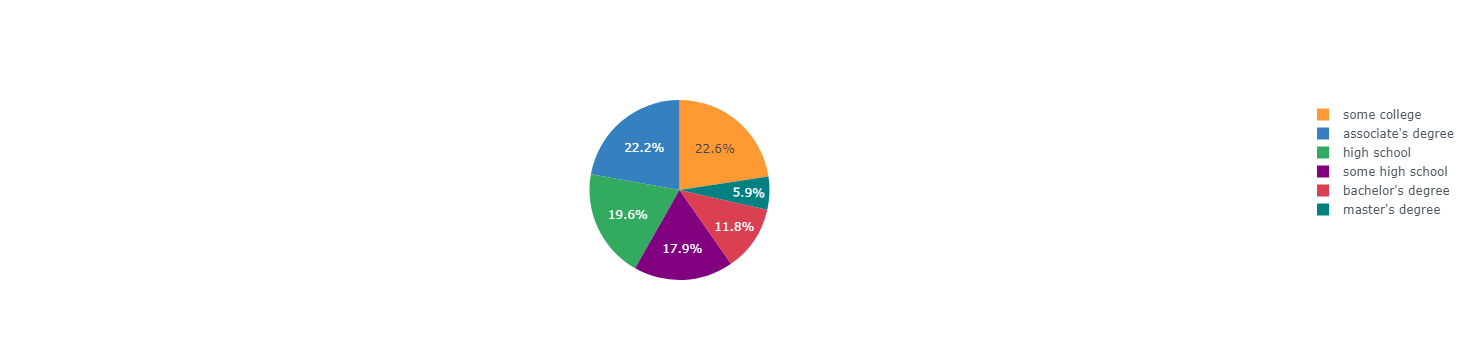

In [12]:
df["parental level of education"].value_counts().reset_index().iplot(kind="pie", labels="parental level of education", values="count")

In [17]:
# El total de registros es el siguiente:
df.shape[0]

1000

In [20]:
# Se establece que para la preparación del curso, queremos unicamente los registros donde los estudiantes lo completaron y tuvieron un lunch completo
df = df[df["test preparation course"] == "completed"]
df = df[df["lunch"] == "standard"]

In [21]:
# El total de registros luego de la selección de los datos es el siguiente:
df.shape[0]

227

In [25]:
# Se eliminarán las siguientes columnas:
df.drop(columns=['gender', 'race/ethnicity', 'lunch', 'test preparation course'], inplace=True)

df

KeyError: "['gender', 'race/ethnicity', 'lunch', 'test preparation course'] not found in axis"

In [26]:
# Se calcula el promedio obtenido en cada examen.
numeric_columns = df.select_dtypes(include=['number'])

# Calcular el promedio de los valores en cada fila
df['promedio'] = numeric_columns.mean(axis=1)

In [27]:
df

,parental level of education,math score,reading score,writing score,promedio
1,some college,69,90,88,82.333333
6,some college,88,95,92,91.666667
13,some college,78,72,70,73.333333
35,associate's degree,81,81,79,80.333333
46,associate's degree,55,65,62,60.666667
...,...,...,...,...,...
983,some college,78,87,91,85.333333
987,some high school,81,75,76,77.333333
991,some high school,65,82,78,75.000000
995,master's degree,88,99,95,94.000000


In [28]:
# Se eliminarán las columnas de los examenes para dejar unicamente la del promedio:
df.drop(columns=['math score', 'reading score', 'writing score'], inplace=True)

df

,parental level of education,promedio
1,some college,82.333333
6,some college,91.666667
13,some college,73.333333
35,associate's degree,80.333333
46,associate's degree,60.666667
...,...,...
983,some college,85.333333
987,some high school,77.333333
991,some high school,75.000000
995,master's degree,94.000000


Notemos que se tienen los siguientes datos:

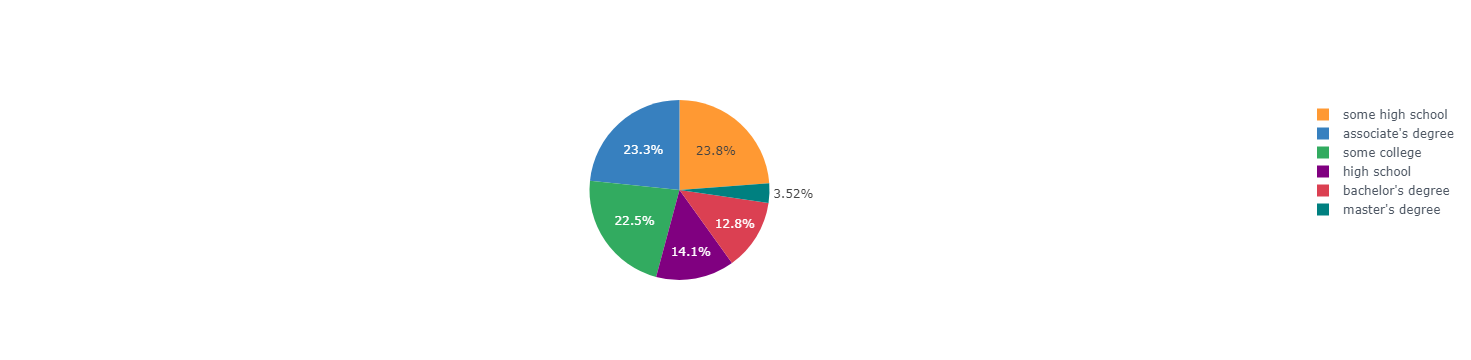

In [30]:
df["parental level of education"].value_counts().reset_index().iplot(kind="pie", labels="parental level of education", values="count")

Notemos que se tienen las siguientes cantidades de registros para cada nivel de educación parental:

In [31]:
df['parental level of education'].value_counts()

parental level of education
some high school      54
associate's degree    53
some college          51
high school           32
bachelor's degree     29
master's degree        8
Name: count, dtype: int64

Se toma una muestra aleatoria de 5 registros de alumnos con cada tipo de nivel de educación parental:

In [32]:
# Para alumnos con padres con nivel de educación "some high school":
df_SHS = df[df["parental level of education"] == "some high school"].sample(5)
df_SHS.rename(columns={'promedio': 'prom_SHS'}, inplace=True)
df_SHS = df_SHS.reset_index(drop=True)

# Para alumnos con padres con nivel de educación "associate's degree":
df_AD = df[df["parental level of education"] == "associate's degree"].sample(5)
df_AD.rename(columns={'promedio': 'prom_AD'}, inplace=True)
df_AD = df_AD.reset_index(drop=True)

# Para alumnos con padres con nivel de educación "some college":
df_SC = df[df["parental level of education"] == "some college"].sample(5)
df_SC.rename(columns={'promedio': 'prom_SC'}, inplace=True)
df_SC = df_SC.reset_index(drop=True)

# Para alumnos con padres con nivel de educación "high school":
df_HS = df[df["parental level of education"] == "high school"].sample(5)
df_HS.rename(columns={'promedio': 'prom_HS'}, inplace=True)
df_HS = df_HS.reset_index(drop=True)

# Para alumnos con padres con nivel de educación "bachelor's degree":
df_BD = df[df["parental level of education"] == "bachelor's degree"].sample(5)
df_BD.rename(columns={'promedio': 'prom_BD'}, inplace=True)
df_BD = df_BD.reset_index(drop=True)

# Para alumnos con padres con nivel de educación "master's degree":
df_MD = df[df["parental level of education"] == "master's degree"].sample(5)
df_MD.rename(columns={'promedio': 'prom_MD'}, inplace=True)
df_MD = df_MD.reset_index(drop=True)

In [33]:
PruebaMW = pd.concat([df_SHS['prom_SHS'], df_AD['prom_AD'], df_SC['prom_SC'], df_HS['prom_HS'], df_BD['prom_BD'], df_MD['prom_MD']], axis=1)
PruebaMW

,prom_SHS,prom_AD,prom_SC,prom_HS,prom_BD,prom_MD
0,43.333333,77.333333,72.000000,59.666667,72.000000,79.333333
1,59.000000,77.333333,67.000000,82.333333,86.666667,61.666667
2,48.666667,57.666667,83.666667,77.666667,76.666667,71.666667
3,72.666667,77.666667,84.000000,82.666667,74.666667,87.000000
4,80.666667,97.000000,78.666667,86.333333,74.000000,83.333333


El analisis continuará en una hoja de excel:

In [34]:
PruebaMW.to_csv('ANALISIS_Exp_uni_dis_compl_aleat.csv', index=False)